In [67]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [31]:
trainDF = pd.read_csv('/Users/sanjitteja/Desktop/ML/Train.csv.xls')
testDF = pd.read_csv('/Users/sanjitteja/Desktop/ML/Test.csv.xls')
trainDF.drop('Employee_ID',axis=1,inplace=True)
testDF.drop('Employee_ID',axis=1,inplace=True)
trainDF.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [32]:
testDF.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [33]:
trainDF.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [34]:
testDF.isna().sum()

Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

Mode imputation for 'Pay_scale' and 'Work_Life_balance'

In [35]:
trainDF[trainDF['Pay_Scale'].isnull()] = trainDF['Pay_Scale'].mode()[0]
trainDF[trainDF['Work_Life_balance'].isnull()] = trainDF['Work_Life_balance'].mode()[0]


testDF[testDF['Pay_Scale'].isnull()] = testDF['Pay_Scale'].mode()[0]
testDF[testDF['Work_Life_balance'].isnull()] = testDF['Work_Life_balance'].mode()[0]

Linear regression for missing values imputation - Train csv

In [36]:
target_vars = ['Age', 'Time_of_service', 'VAR2', 'VAR4']
features = ['Time_since_promotion', 'growth_rate', 'Pay_Scale', 'Work_Life_balance', 'Attrition_rate']

for target in target_vars:
    # Splitting the data
    X_train = trainDF[features][~trainDF[target].isnull()]
    y_train = trainDF[target][~trainDF[target].isnull()]
    X_pred = trainDF[features][trainDF[target].isnull()]

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting missing target variable values
    y_pred = model.predict(X_pred)

    # Imputing missing target variable values
    trainDF.loc[trainDF[target].isnull(), target] = y_pred

Linear regression imputation for missing values - Test csv


In [37]:
target_vars = ['Age', 'Time_of_service', 'VAR2', 'VAR4']
features = ['Time_since_promotion', 'growth_rate', 'Pay_Scale', 'Work_Life_balance']

for target in target_vars:
    # Splitting the data
    X_train = testDF[features][~testDF[target].isnull()]
    y_train = testDF[target][~testDF[target].isnull()]
    X_pred = testDF[features][testDF[target].isnull()]

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting missing target variable values
    y_pred = model.predict(X_pred)

    # Imputing missing target variable values
    testDF.loc[testDF[target].isnull(), target] = y_pred

In [38]:
categorical_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']
for col in categorical_cols:
    print(f'{col}---->{trainDF[col].unique()}')

Gender---->['F' 'M' np.float64(8.0) np.float64(1.0)]
Relationship_Status---->['Married' 'Single' np.float64(8.0) np.float64(1.0)]
Hometown---->['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington' np.float64(8.0)
 np.float64(1.0)]
Unit---->['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security' np.float64(8.0) np.float64(1.0)]
Decision_skill_possess---->['Conceptual' 'Analytical' 'Behavioral' 'Directive' np.float64(8.0)
 np.float64(1.0)]
Compensation_and_Benefits---->['type2' 'type3' 'type0' 'type4' 'type1' np.float64(8.0) np.float64(1.0)]


In [39]:
trainDF = trainDF[~trainDF[categorical_cols].isin([8.0, 1.0]).any(axis=1)]
testDF = testDF[~testDF[categorical_cols].isin([8.0, 1.0]).any(axis=1)]

In [43]:
frequency_encoded = trainDF.groupby('Unit').size()
trainDF['Unit'] = trainDF['Unit'].map(frequency_encoded)

frequency_encoded = testDF.groupby('Unit').size()
testDF['Unit'] = testDF['Unit'].map(frequency_encoded)

In [44]:
LE = LabelEncoder()
for feature in ['Gender', 'Relationship_Status', 'Decision_skill_possess', 'Compensation_and_Benefits', 'Hometown']:
    trainDF[feature] = LE.fit_transform(trainDF[feature])
trainDF.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,1,1391,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,1,24.0,3,1,3,1167,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,0,58.0,3,0,0,193,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,0,26.0,3,1,2,344,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,1.839239,3,7,3,0.0668
4,0,31.0,1,0,3,1167,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


In [45]:
for feature in ['Gender', 'Relationship_Status', 'Decision_skill_possess', 'Compensation_and_Benefits', 'Hometown']:
    testDF[feature] = LE.fit_transform(testDF[feature])
testDF.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,3,309,2,7.0,4,30,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,2,568,3,41.0,2,72,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,3,445,3,21.0,3,25,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,4,106,0,11.0,4,28,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,1,309,2,12.0,4,47,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


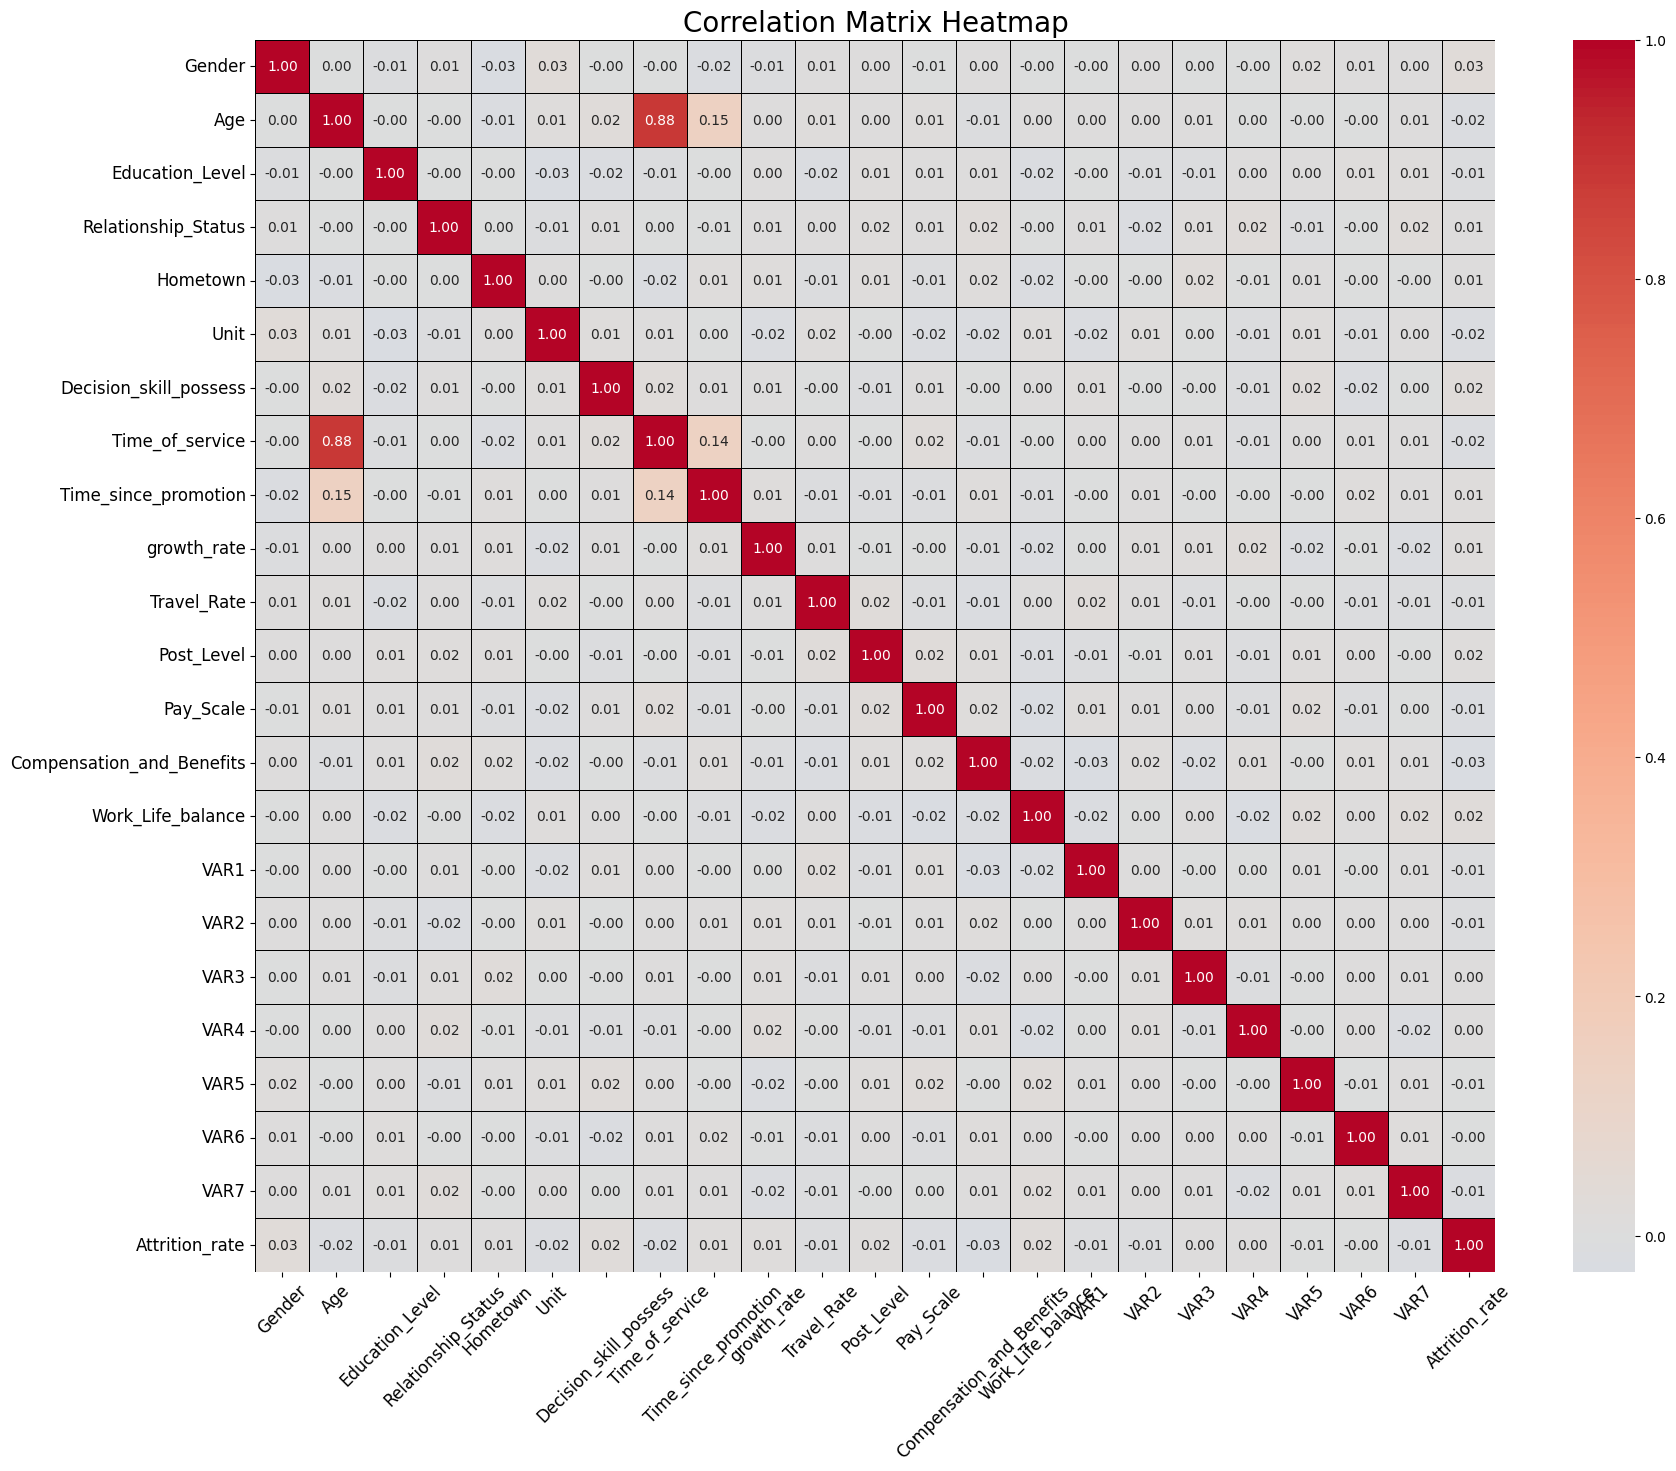

In [47]:
correlation_matrix = trainDF.corr()
plt.figure(figsize=(20, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, linecolor='black')

plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

In [48]:
trainDF.drop(['VAR3', 'VAR4','VAR6'], axis = 1, inplace=True)
testDF.drop(['VAR3', 'VAR4','VAR6'], axis = 1, inplace=True)

##### Box Plot visualization

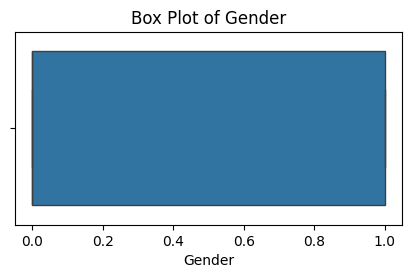

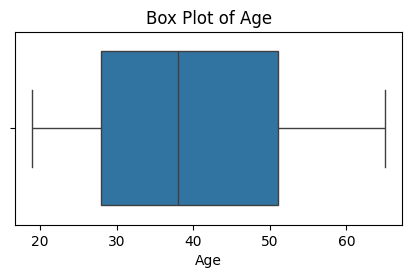

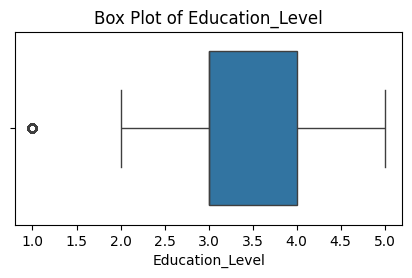

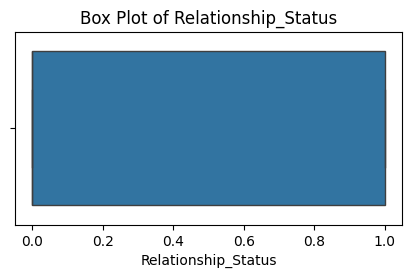

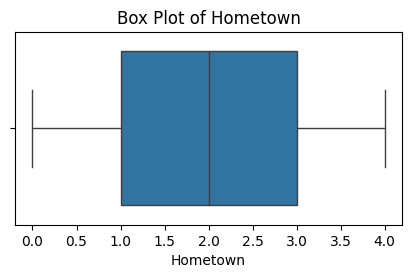

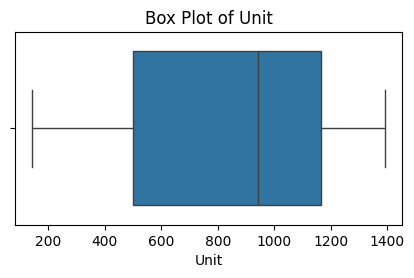

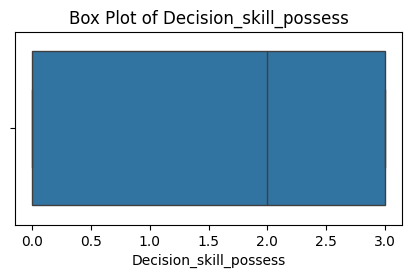

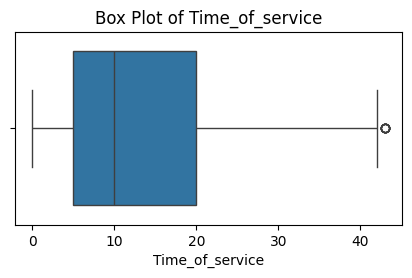

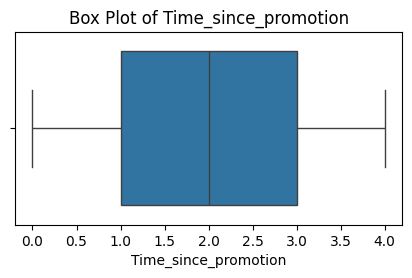

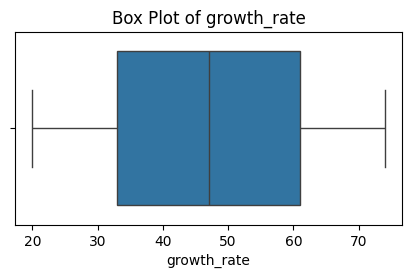

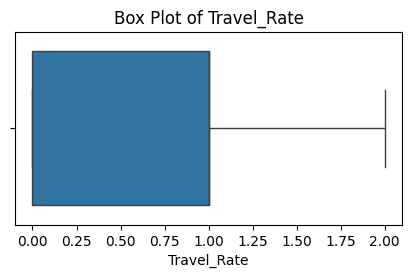

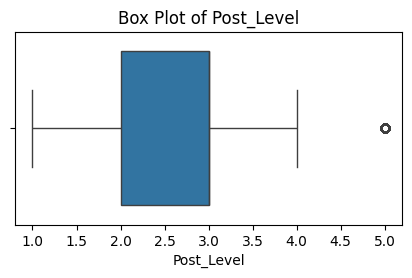

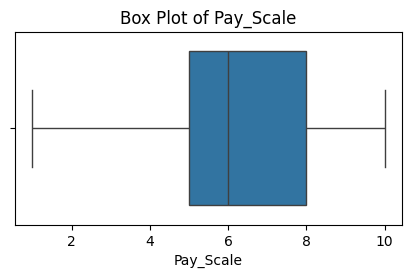

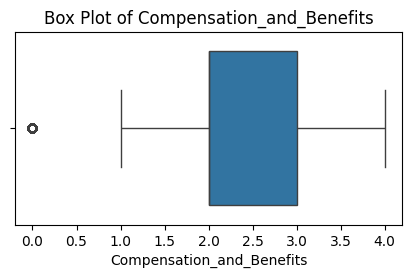

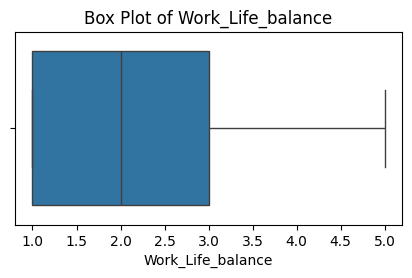

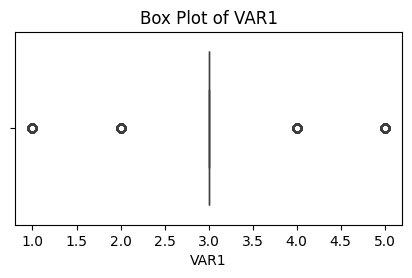

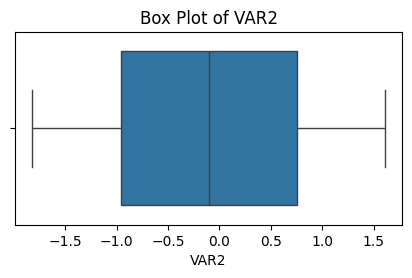

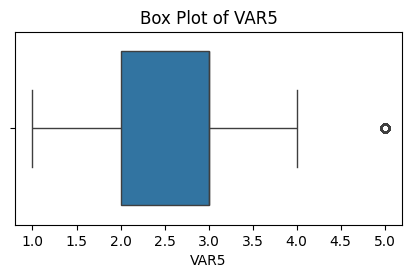

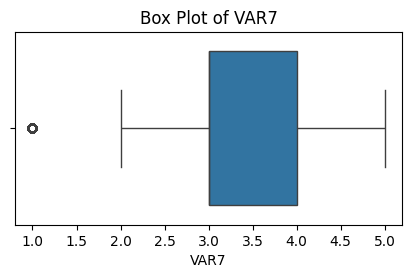

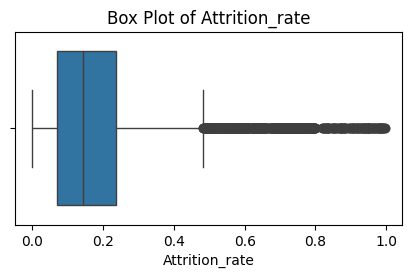

In [50]:
for column in trainDF.columns:
    plt.figure(figsize=(5, 2.5))
    sns.boxplot(x=trainDF[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

##

##### Histogram

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Relationship_Status'}>],
       [<Axes: title={'center': 'Hometown'}>,
        <Axes: title={'center': 'Unit'}>,
        <Axes: title={'center': 'Decision_skill_possess'}>,
        <Axes: title={'center': 'Time_of_service'}>],
       [<Axes: title={'center': 'Time_since_promotion'}>,
        <Axes: title={'center': 'growth_rate'}>,
        <Axes: title={'center': 'Travel_Rate'}>,
        <Axes: title={'center': 'Post_Level'}>],
       [<Axes: title={'center': 'Pay_Scale'}>,
        <Axes: title={'center': 'Compensation_and_Benefits'}>,
        <Axes: title={'center': 'Work_Life_balance'}>,
        <Axes: title={'center': 'VAR1'}>],
       [<Axes: title={'center': 'VAR2'}>,
        <Axes: title={'center': 'VAR5'}>,
        <Axes: title={'center': 'VAR7'}>,
        <Axes: title={'center': 'Attrition'}>]], dtype=object)

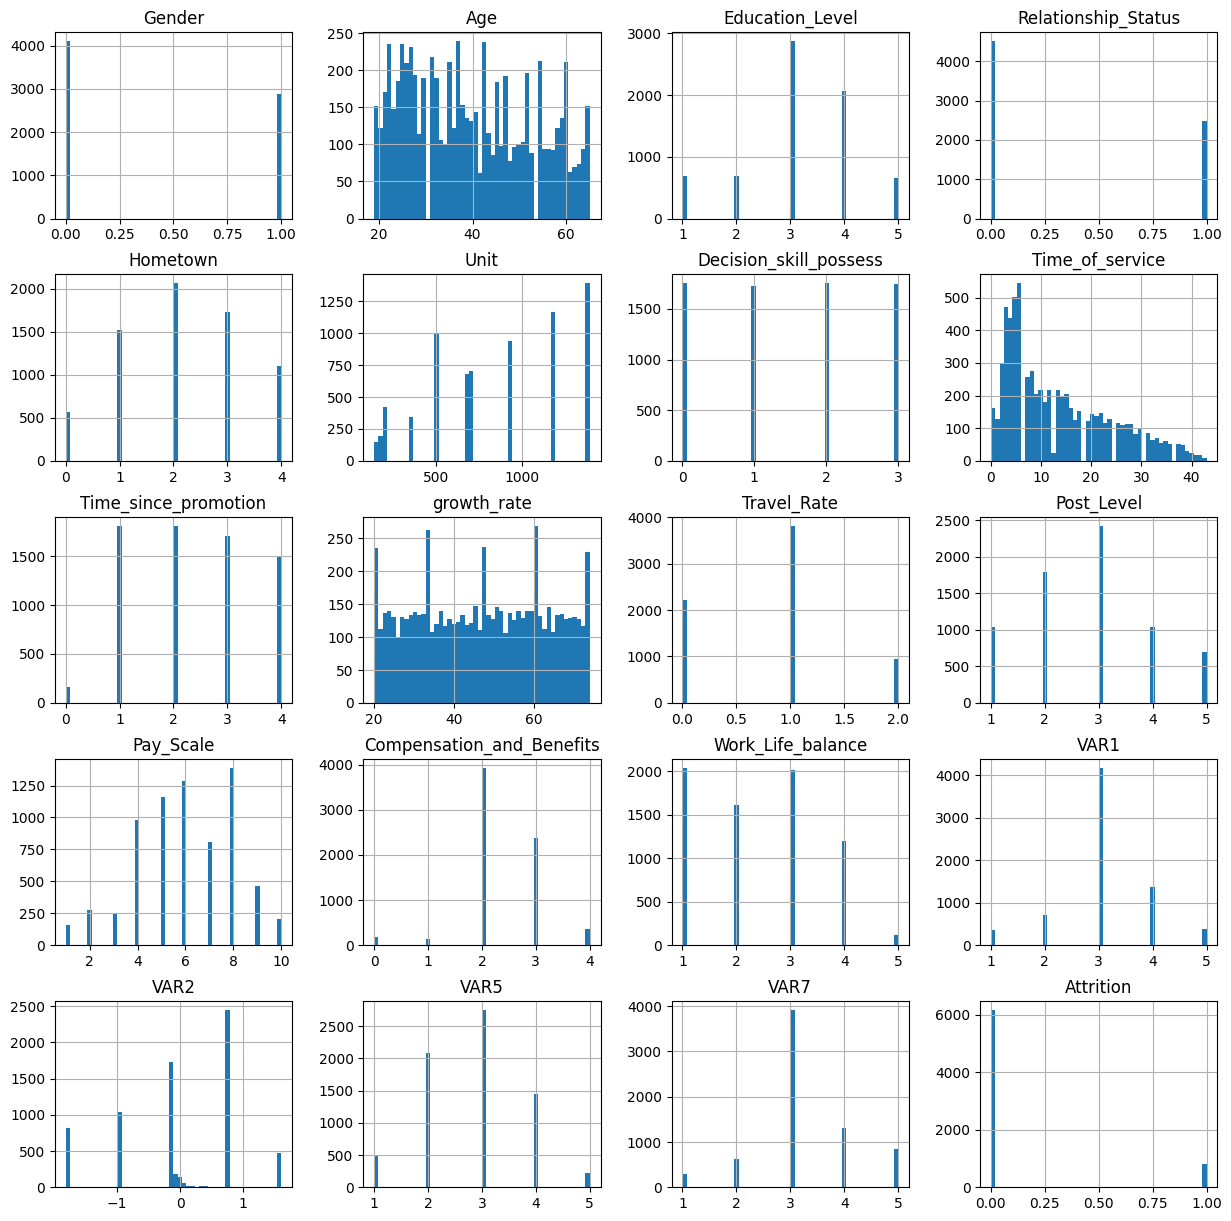

In [56]:
trainDF.hist(bins=50, figsize=(15, 15))

###

In [51]:
trainDF['Attrition'] = trainDF['Attrition_rate'].apply(lambda x: 1 if x > 0.35 else 0)

trainDF.drop('Attrition_rate', axis=1, inplace=True)

In [66]:
X = trainDF.drop(['Attrition'], axis=1)
y = trainDF['Attrition']

# Train a Random Forest model to get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_prob = rf_model.predict_proba(testDF)[:, 1]
# Get feature importances from the Random Forest model
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf = feature_importance_rf.drop('Age')
top_features = feature_importance_rf.nlargest(5)
print("\nTop 5 Features Contributing to Attrition (based on Random Forest):")
print(top_features)

# We cant change age to decrease ATTRITION

y_pred = rf_model.predict(testDF)

y_pred.shape


Top 5 Features Contributing to Attrition (based on Random Forest):
growth_rate        0.104904
Time_of_service    0.093437
VAR2               0.073209
Unit               0.067532
Pay_Scale          0.063592
dtype: float64


In [68]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, roc_auc_score, precision_recall_curve
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)

f1 = f1_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

ValueError: Found input variables with inconsistent numbers of samples: [6981, 2992]

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
from sklearn.metrics import roc_curve
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()